In [1]:
from cdlib import algorithms 

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
import itertools
from collections import defaultdict
from cdlib import evaluation

In [3]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize = (16,8), dpi = 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels = labels)
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xticks(fontsize = fontsize, alpha = 1)
    plt.xlabel('Algorithms', fontsize = fontsize)
    plt.ylabel(title, fontsize = fontsize)
    plt.title(title+" Box Plot", fontsize = fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.yscale("log")
    
    
    # Rimuove i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [4]:
def scatter_plot(sizes, title):
    fig = plt.figure(figsize = (16,8), dpi = 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha = 0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xticks(fontsize = fontsize, alpha = 1)
    plt.xlabel("Size", fontsize = fontsize)
    plt.ylabel("Internal Edge Density", fontsize = fontsize)
    plt.title(title + " Scatter Plot", fontsize = fontsize)
    plt.legend(labels,fontsize = fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.xscale("log")
    plt.yscale("linear")
    
    
    # rimuove i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [5]:
df = pd.read_csv(r'C:\Users\Utente\Desktop\SnaProject\dati.csv')

In [6]:
G = nx.read_weighted_edgelist(r'C:\Users\Utente\Desktop\SnaProject\dati.csv', delimiter = ',')

### GM Community

In [7]:
GM_coms = algorithms.greedy_modularity(G.to_undirected()) 

In [8]:
GM_evaluation_pd = pd.DataFrame(columns = ["index", "min", "max", "mean", "std"])

In [11]:
GM_avg_internal_deg = np.array(evaluation.average_internal_degree(G,GM_coms, summary = False))  
GM_internal_edge_density = np.array(evaluation.internal_edge_density(G,GM_coms, summary = False))
GM_size = np.array(evaluation.size(G,GM_coms, summary = False))
GM_edges_inside = np.array(evaluation.edges_inside(G,GM_coms, summary = False))
GM_cut_ratio = np.array(evaluation.cut_ratio(G,GM_coms, summary = False))
GM_conductance = np.array(evaluation.conductance(G,GM_coms, summary = False))
GM_modularity = np.array(evaluation.link_modularity(G,GM_coms, summary = False))

In [12]:
GM_modularity

array([None, None, 0.11091986428594454, None], dtype=object)

In [13]:
GM_evaluation_pd.loc[0] = ("Average Internal Degree", GM_avg_internal_deg.min(), 
                         GM_avg_internal_deg.max(), 
                         GM_avg_internal_deg.mean(), 
                         GM_avg_internal_deg.std())
GM_evaluation_pd.loc[1] = ("Internal Edge Density", GM_internal_edge_density.min(), 
                         GM_internal_edge_density.max(), 
                         GM_internal_edge_density.mean(), 
                         GM_internal_edge_density.std())
GM_evaluation_pd.loc[2] = ("Size", GM_size.min(), 
                         GM_size.max(), 
                         GM_size.mean(), 
                         GM_size.std())
GM_evaluation_pd.loc[3] = ("Edges Inside", GM_edges_inside.min(), 
                         GM_edges_inside.max(), 
                         GM_edges_inside.mean(), 
                         GM_edges_inside.std())
GM_evaluation_pd.loc[4] = ("Cut Ratio", GM_cut_ratio.min(), 
                         GM_cut_ratio.max(), 
                         GM_cut_ratio.mean(), 
                         GM_cut_ratio.std())
GM_evaluation_pd.loc[5] = ("Conductance", GM_conductance.min(), 
                         GM_conductance.max(), 
                         GM_conductance.mean(), 
                         GM_conductance.std())

In [14]:
print("Number of Communities: %d"%len(GM_coms.communities))

Number of Communities: 279


In [15]:
nodes_l = []
for i in GM_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 19025


In [16]:
GM_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,1.000000,34.325416,5.724263,4.529299
1,Internal Edge Density,0.000604,0.250000,0.223381,0.055810
2,Size,2.000000,5894.000000,68.189964,542.639807
3,Edges Inside,1.000000,101157.000000,638.068100,6645.249837
4,Cut Ratio,0.000000,0.000684,0.000164,0.000115
5,Conductance,0.000000,0.800000,0.380143,0.213666


### Label Propagation

In [17]:
label_coms = algorithms.label_propagation(G.to_undirected())

In [18]:
label_evaluation_pd = pd.DataFrame(columns = ["index", "min", "max", "mean", "std"])

In [19]:
label_avg_internal_deg = np.array(evaluation.average_internal_degree(G,label_coms, summary = False))
label_internal_edge_density = np.array(evaluation.internal_edge_density(G,label_coms, summary =  False))
label_size = np.array(evaluation.size(G,label_coms, summary = False))
label_edges_inside = np.array(evaluation.edges_inside(G,label_coms, summary = False))
label_cut_ratio = np.array(evaluation.cut_ratio(G,label_coms, summary = False))
label_conductance = np.array(evaluation.conductance(G,label_coms, summary = False))
label_modularity = np.array(evaluation.link_modularity(G,label_coms, summary = False))

In [20]:
label_modularity

array([None, None, 0.13847377176529369, None], dtype=object)

In [21]:
label_evaluation_pd.loc[0] = ("Average Internal Degree", label_avg_internal_deg.min(), 
                         label_avg_internal_deg.max(), 
                         label_avg_internal_deg.mean(), 
                         label_avg_internal_deg.std())
label_evaluation_pd.loc[1] = ("Internal Edge Density", label_internal_edge_density.min(), 
                         label_internal_edge_density.max(), 
                         label_internal_edge_density.mean(), 
                         label_internal_edge_density.std())
label_evaluation_pd.loc[2] = ("Size", label_size.min(), 
                         label_size.max(), 
                         label_size.mean(), 
                         label_size.std())
label_evaluation_pd.loc[3] = ("Edges Inside", label_edges_inside.min(), 
                         label_edges_inside.max(), 
                         label_edges_inside.mean(), 
                         label_edges_inside.std())
label_evaluation_pd.loc[4] = ("Cut Ratio", label_cut_ratio.min(), 
                         label_cut_ratio.max(), 
                         label_cut_ratio.mean(), 
                         label_cut_ratio.std())
label_evaluation_pd.loc[5] = ("Conductance", label_conductance.min(), 
                         label_conductance.max(), 
                         label_conductance.mean(), 
                         label_conductance.std())

In [22]:
print("Number of Communities: %d"%len(label_coms.communities))

Number of Communities: 675


In [23]:
nodes_l = []
for i in label_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 19025


In [24]:
label_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,1.000000,31.619048,4.148893,3.953353
1,Internal Edge Density,0.000458,0.250000,0.239897,0.034880
2,Size,2.000000,15022.000000,28.185185,577.583571
3,Edges Inside,1.000000,206637.000000,329.256296,7947.024721
4,Cut Ratio,0.000000,0.000415,0.000106,0.000070
5,Conductance,0.000000,0.666667,0.379267,0.134568


### Louvain

In [25]:
louvain_coms = algorithms.louvain(G.to_undirected(), resolution = 1., randomize = False)

In [26]:
louvain_evaluation_pd = pd.DataFrame(columns = ["index", "min", "max", "mean", "std"])

In [27]:
louvain_avg_internal_deg = np.array(evaluation.average_internal_degree(G,louvain_coms, summary = False))
louvain_internal_edge_density = np.array(evaluation.internal_edge_density(G,louvain_coms, summary = False))
louvain_size = np.array(evaluation.size(G,louvain_coms, summary =  False))
louvain_edges_inside = np.array(evaluation.edges_inside(G,louvain_coms, summary = False))
louvain_cut_ratio = np.array(evaluation.cut_ratio(G,louvain_coms, summary = False))
louvain_conductance = np.array(evaluation.conductance(G,louvain_coms, summary =  False))
louvain_modularity = np.array(evaluation.link_modularity(G,louvain_coms, summary = False))

In [28]:
louvain_modularity

array([None, None, 0.0898297570308605, None], dtype=object)

In [29]:
louvain_evaluation_pd.loc[0] = ("Average Internal Degree", louvain_avg_internal_deg.min(), 
                         louvain_avg_internal_deg.max(), 
                         louvain_avg_internal_deg.mean(), 
                         louvain_avg_internal_deg.std())
louvain_evaluation_pd.loc[1] = ("Internal Edge Density", louvain_internal_edge_density.min(), 
                         louvain_internal_edge_density.max(), 
                         louvain_internal_edge_density.mean(), 
                         louvain_internal_edge_density.std())
louvain_evaluation_pd.loc[2] = ("Size", louvain_size.min(), 
                         louvain_size.max(), 
                         louvain_size.mean(), 
                         louvain_size.std())
louvain_evaluation_pd.loc[3] = ("Edges Inside", louvain_edges_inside.min(), 
                         louvain_edges_inside.max(), 
                         louvain_edges_inside.mean(), 
                         louvain_edges_inside.std())
louvain_evaluation_pd.loc[4] = ("Cut Ratio", louvain_cut_ratio.min(), 
                         louvain_cut_ratio.max(), 
                         louvain_cut_ratio.mean(), 
                         louvain_cut_ratio.std())
louvain_evaluation_pd.loc[5] = ("Conductance", louvain_conductance.min(), 
                         louvain_conductance.max(), 
                         louvain_conductance.mean(), 
                         louvain_conductance.std())

In [30]:
print("Number of Communities: %d"%len(louvain_coms.communities))

Number of Communities: 21


In [31]:
nodes_l = []
for i in louvain_coms.communities:
    nodes_l += i
    nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 19025


In [32]:
louvain_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,1.000000,31.619048,12.372777,7.116047
1,Internal Edge Density,0.001121,0.250000,0.071366,0.103525
2,Size,2.000000,2518.000000,905.952381,906.425658
3,Edges Inside,1.000000,24490.000000,6865.285714,8020.207367
4,Cut Ratio,0.000000,0.000899,0.000318,0.000291
5,Conductance,0.000000,0.508980,0.270942,0.167002


### Demon

In [33]:
demon_coms = algorithms.demon(G.to_undirected(), min_com_size = 3, epsilon = 0.25)

In [34]:
demon_evaluation_pd = pd.DataFrame(columns=["index", "min", "max", "mean", "std"])

In [35]:
demon_avg_internal_deg = np.array(evaluation.average_internal_degree(G,demon_coms, summary = False))
demon_internal_edge_density = np.array(evaluation.internal_edge_density(G,demon_coms, summary = False))
demon_size = np.array(evaluation.size(G,demon_coms, summary = False))
demon_edges_inside = np.array(evaluation.edges_inside(G,demon_coms, summary = False))
demon_cut_ratio = np.array(evaluation.cut_ratio(G,demon_coms, summary = False))
demon_conductance = np.array(evaluation.conductance(G,demon_coms, summary = False))
demon_modularity = np.array(evaluation.link_modularity(G,demon_coms, summary = False))

In [36]:
demon_modularity

array([None, None, 0.8444644457496707, None], dtype=object)

In [37]:
demon_evaluation_pd.loc[0] = ("Average Internal Degree", demon_avg_internal_deg.min(), 
                         demon_avg_internal_deg.max(), 
                         demon_avg_internal_deg.mean(), 
                         demon_avg_internal_deg.std())
demon_evaluation_pd.loc[1] = ("Internal Edge Density", demon_internal_edge_density.min(), 
                         demon_internal_edge_density.max(), 
                         demon_internal_edge_density.mean(), 
                         demon_internal_edge_density.std())
demon_evaluation_pd.loc[2] = ("Size", demon_size.min(), 
                         demon_size.max(), 
                         demon_size.mean(), 
                         demon_size.std())
demon_evaluation_pd.loc[3] = ("Edges Inside", demon_edges_inside.min(), 
                         demon_edges_inside.max(), 
                         demon_edges_inside.mean(), 
                         demon_edges_inside.std())
demon_evaluation_pd.loc[4] = ("Cut Ratio", demon_cut_ratio.min(), 
                         demon_cut_ratio.max(), 
                         demon_cut_ratio.mean(), 
                         demon_cut_ratio.std())
demon_evaluation_pd.loc[5] = ("Conductance", demon_conductance.min(), 
                         demon_conductance.max(), 
                         demon_conductance.mean(), 
                         demon_conductance.std())

In [38]:
print("Number of Communities: %d"%len(demon_coms.communities))
nodes_l = []
for i in demon_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of Communities: 428
Number of nodes involved: 18626


In [39]:
demon_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,3.777778,59.740864,27.286494,18.325190
1,Internal Edge Density,0.001312,0.250000,0.041889,0.047946
2,Size,5.000000,7367.000000,674.154206,957.663780
3,Edges Inside,10.000000,142399.000000,15451.801402,23073.479035
4,Cut Ratio,0.000000,0.023819,0.007583,0.004188
5,Conductance,0.000000,0.989393,0.786182,0.195730


In [40]:
size_data = {
    "louvain":{
        "name":"Louvain",
        "list":louvain_size
    },
    "greedy modularity":{
        "name":"GM",
        "list":GM_size
    },
    "label propagation":{
        "name":"Label Propagation",
        "list":label_size
    },
    "demon":{
        "name":"Demon",
        "list":demon_size
    }
}

### Confronto

NMI

In [42]:
evaluation.normalized_mutual_information(label_coms, louvain_coms)

MatchingResult(score=0.278962282786125, std=None)

In [43]:
evaluation.normalized_mutual_information(label_coms, GM_coms)

MatchingResult(score=0.4417044816855004, std=None)

In [44]:
evaluation.normalized_mutual_information(GM_coms,louvain_coms)

MatchingResult(score=0.3922691778809936, std=None)

NF1

Louvain vs Label Propagation

In [45]:
evaluation.nf1(label_coms,louvain_coms)

MatchingResult(score=0.0005000887052169104, std=None)

Louvain vs Demon

In [46]:
evaluation.nf1(louvain_coms, demon_coms)

MatchingResult(score=0.007960614152202936, std=None)

Louvain vs GM

In [47]:
evaluation.nf1(louvain_coms, GM_coms)

MatchingResult(score=0.008111249278683993, std=None)

LabelPropagation vs GM

In [48]:
evaluation.nf1(label_coms, GM_coms)

MatchingResult(score=0.04421052143743073, std=None)

Label Propagation vs Demon

In [49]:
evaluation.nf1(label_coms, demon_coms)

MatchingResult(score=0.04117133956386293, std=None)

Demon vs GM

In [50]:
evaluation.nf1(demon_coms, GM_coms)

MatchingResult(score=0.019873455941439057, std=None)

### Grafici

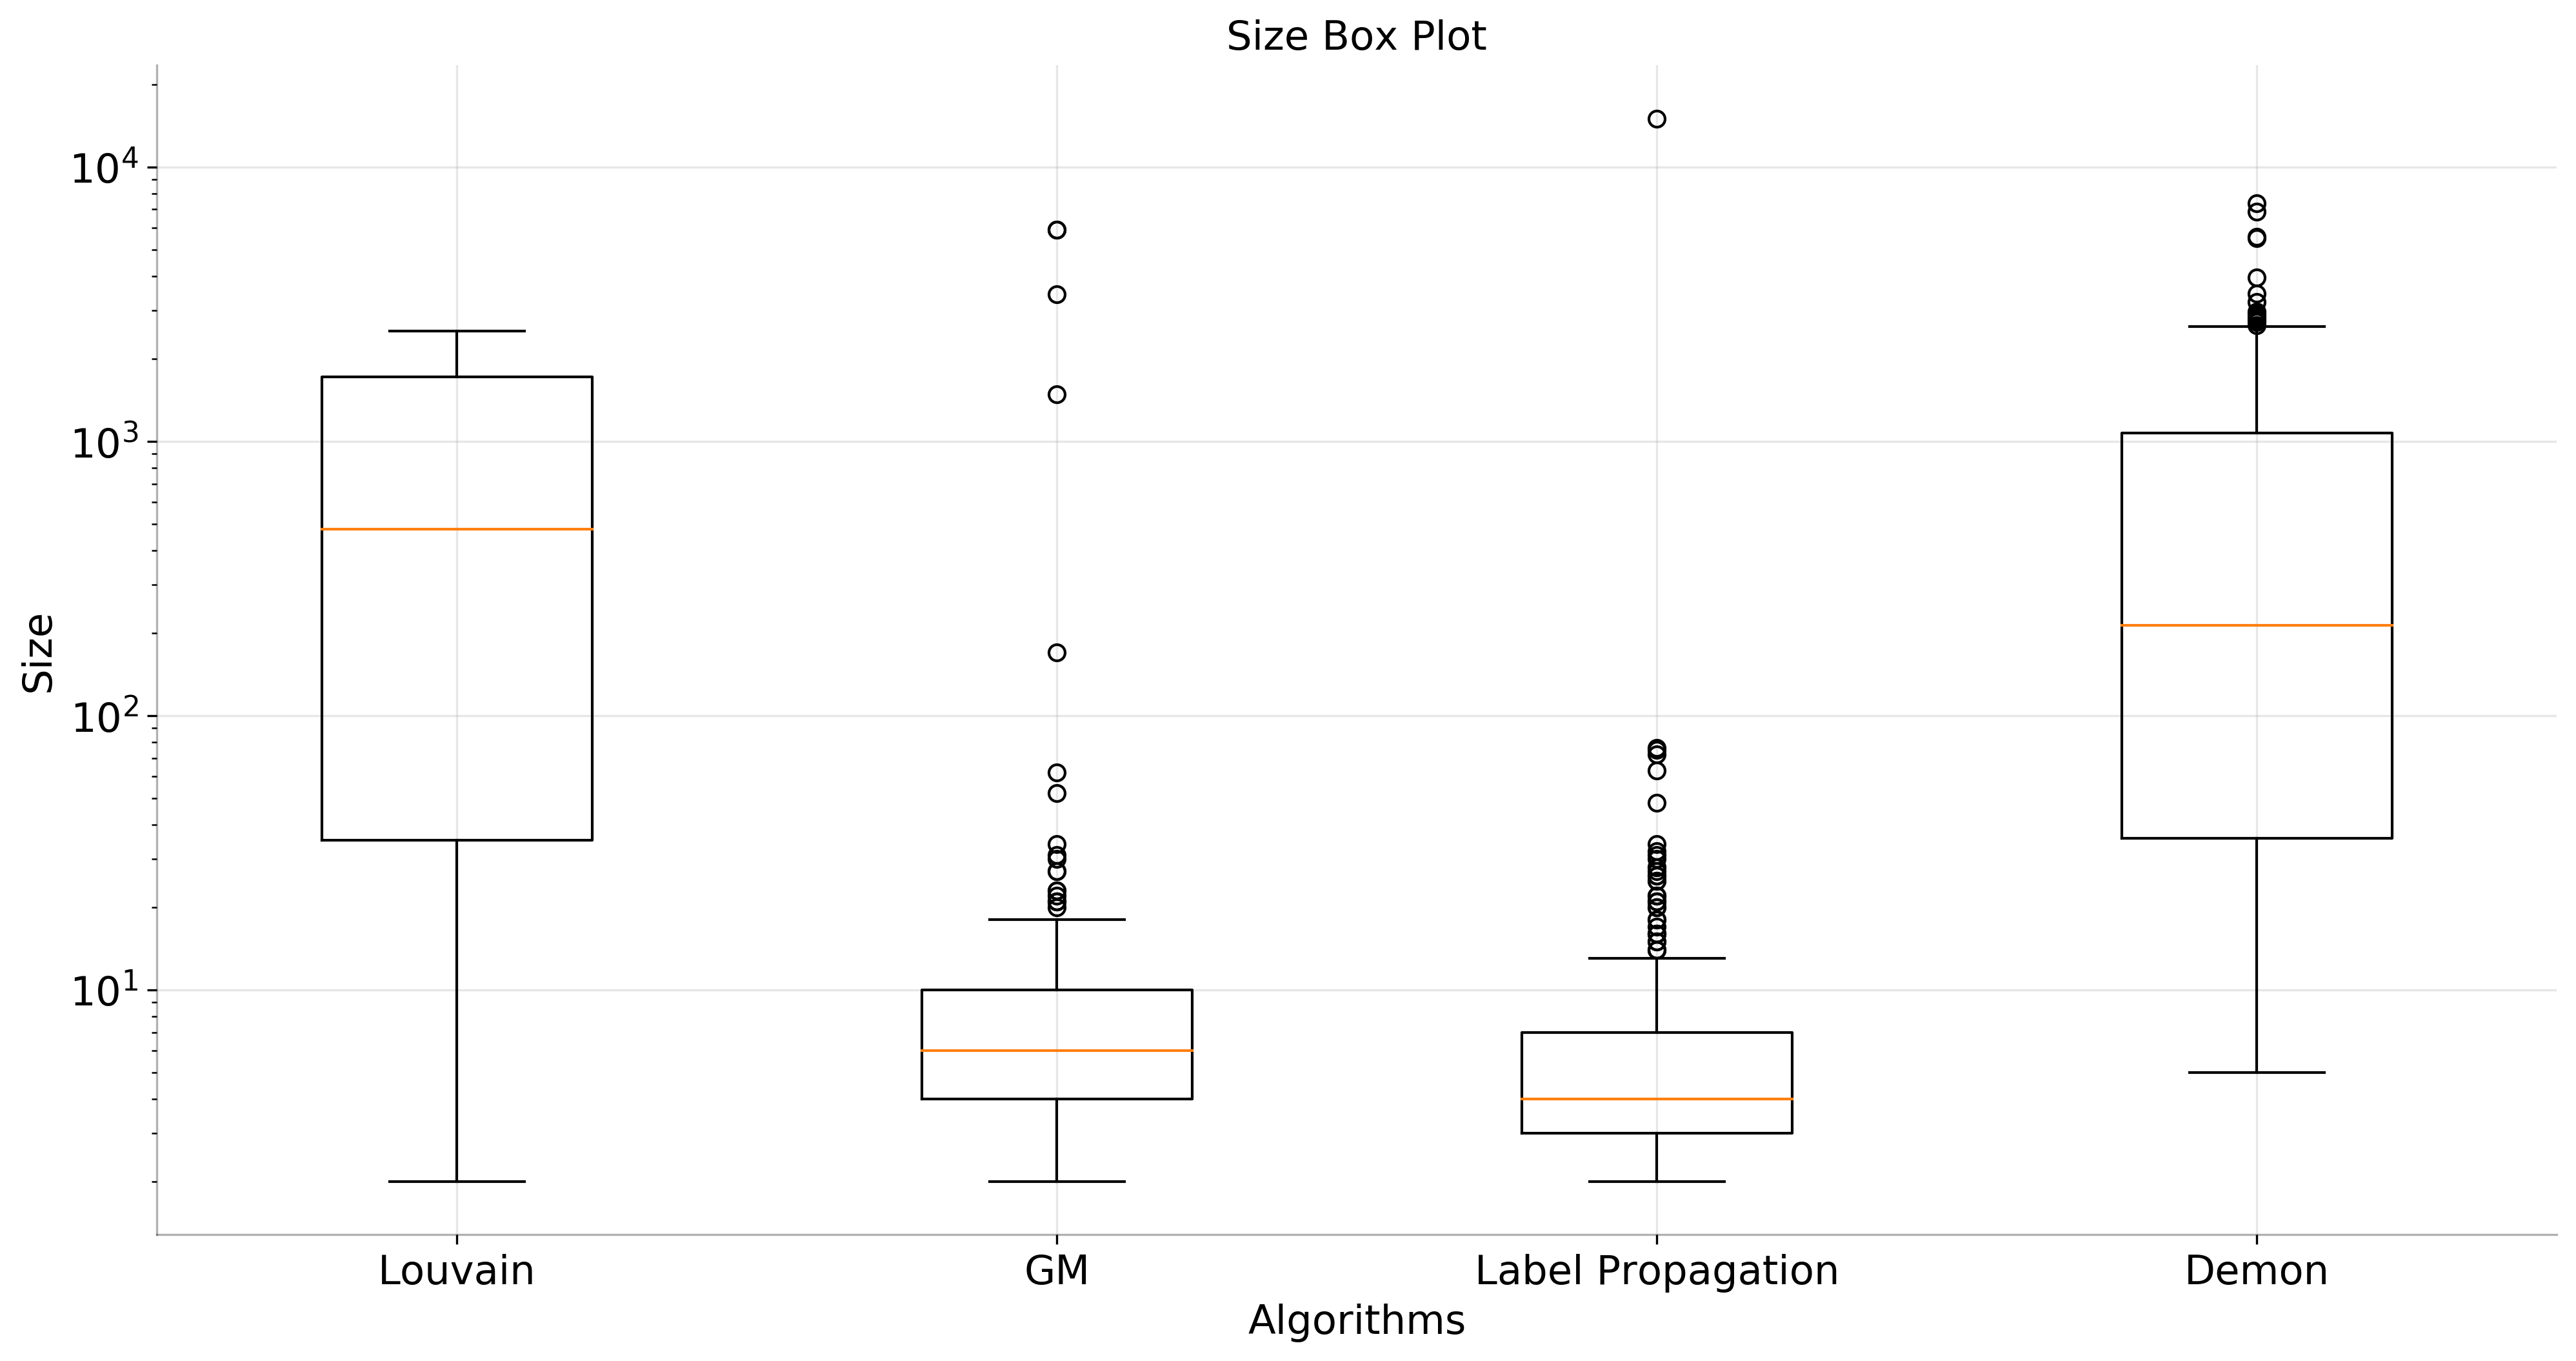

In [51]:
box_plot(size_data, "Size")

In [52]:
edge_density_GM_label = [(label_size, label_internal_edge_density, "Label Propagation"),
                       (GM_size, GM_internal_edge_density, "GM")]

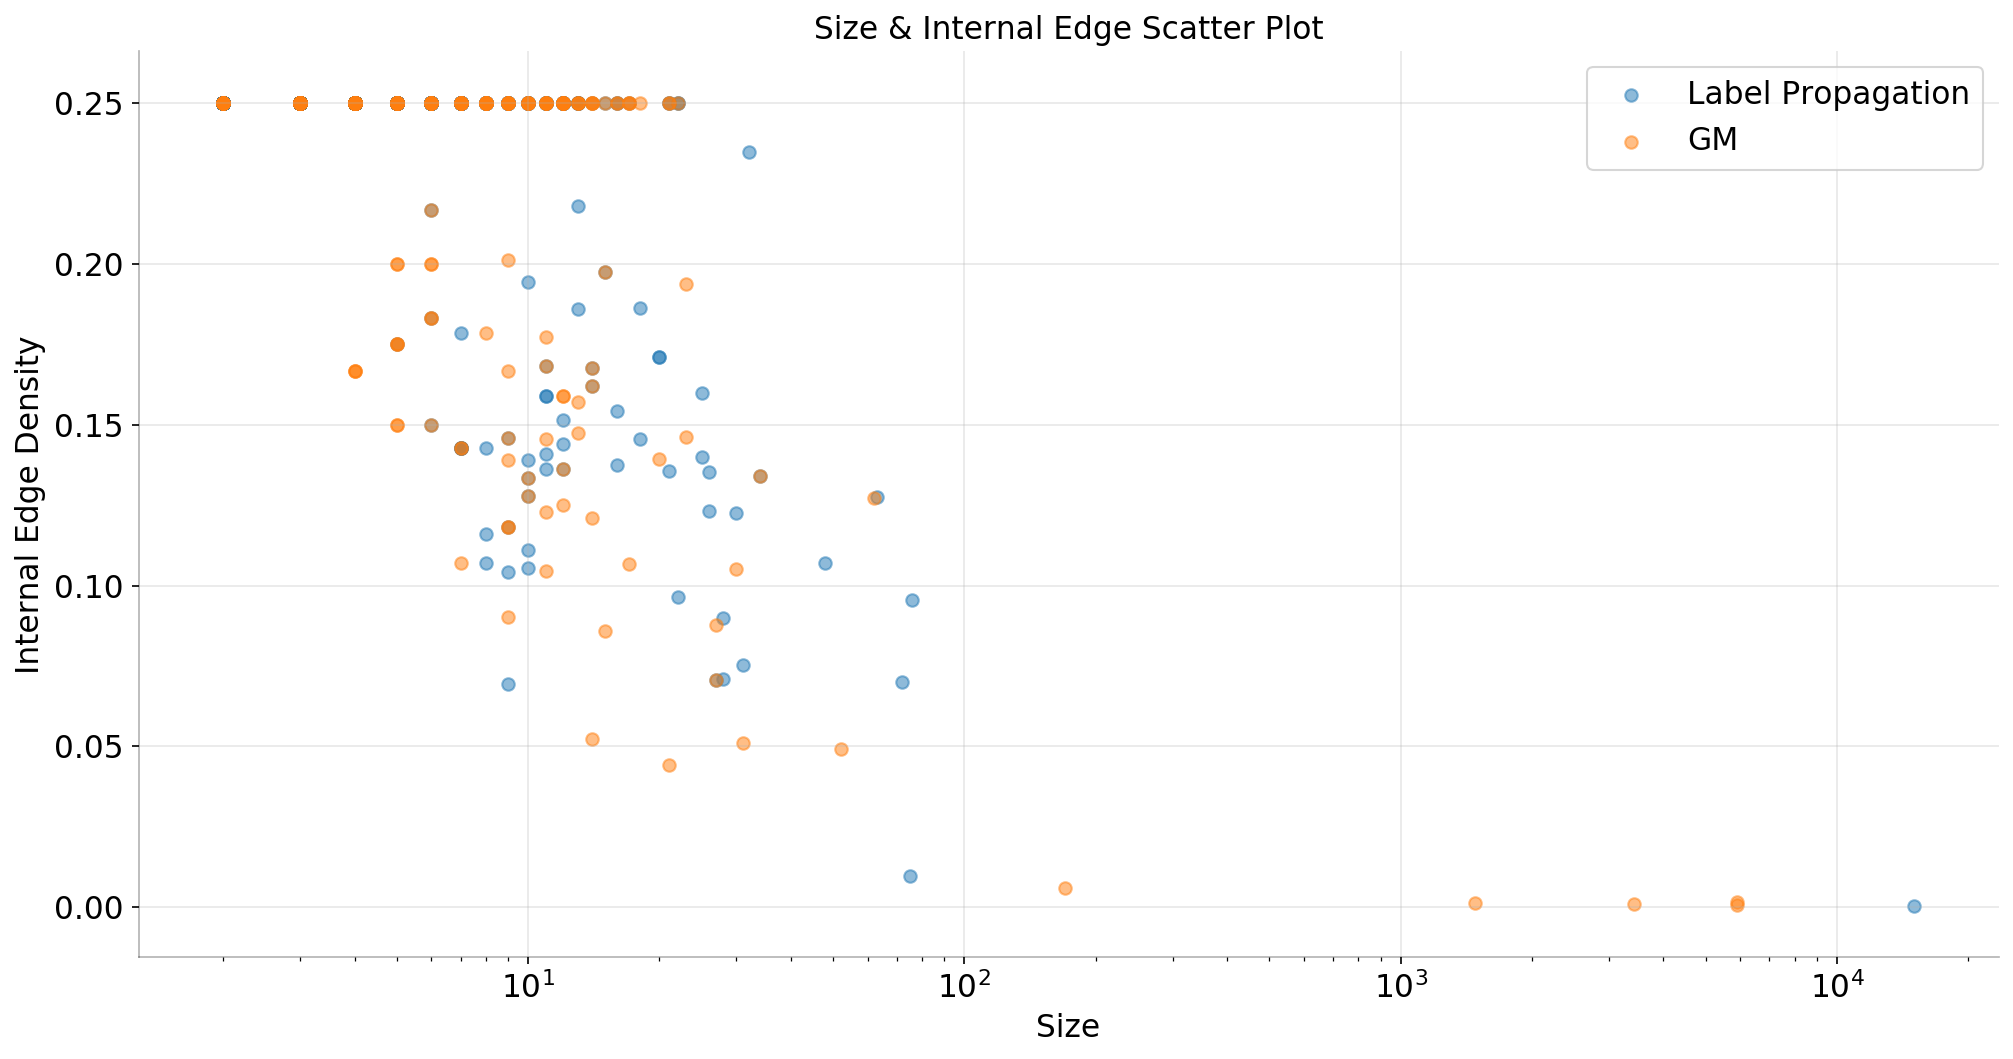

In [53]:
scatter_plot(edge_density_GM_label, "Size & Internal Edge")

In [54]:
edge_density_louvain_demon = [(demon_size, demon_internal_edge_density, "Demon"),
                       (louvain_size, louvain_internal_edge_density, "Louvain")]

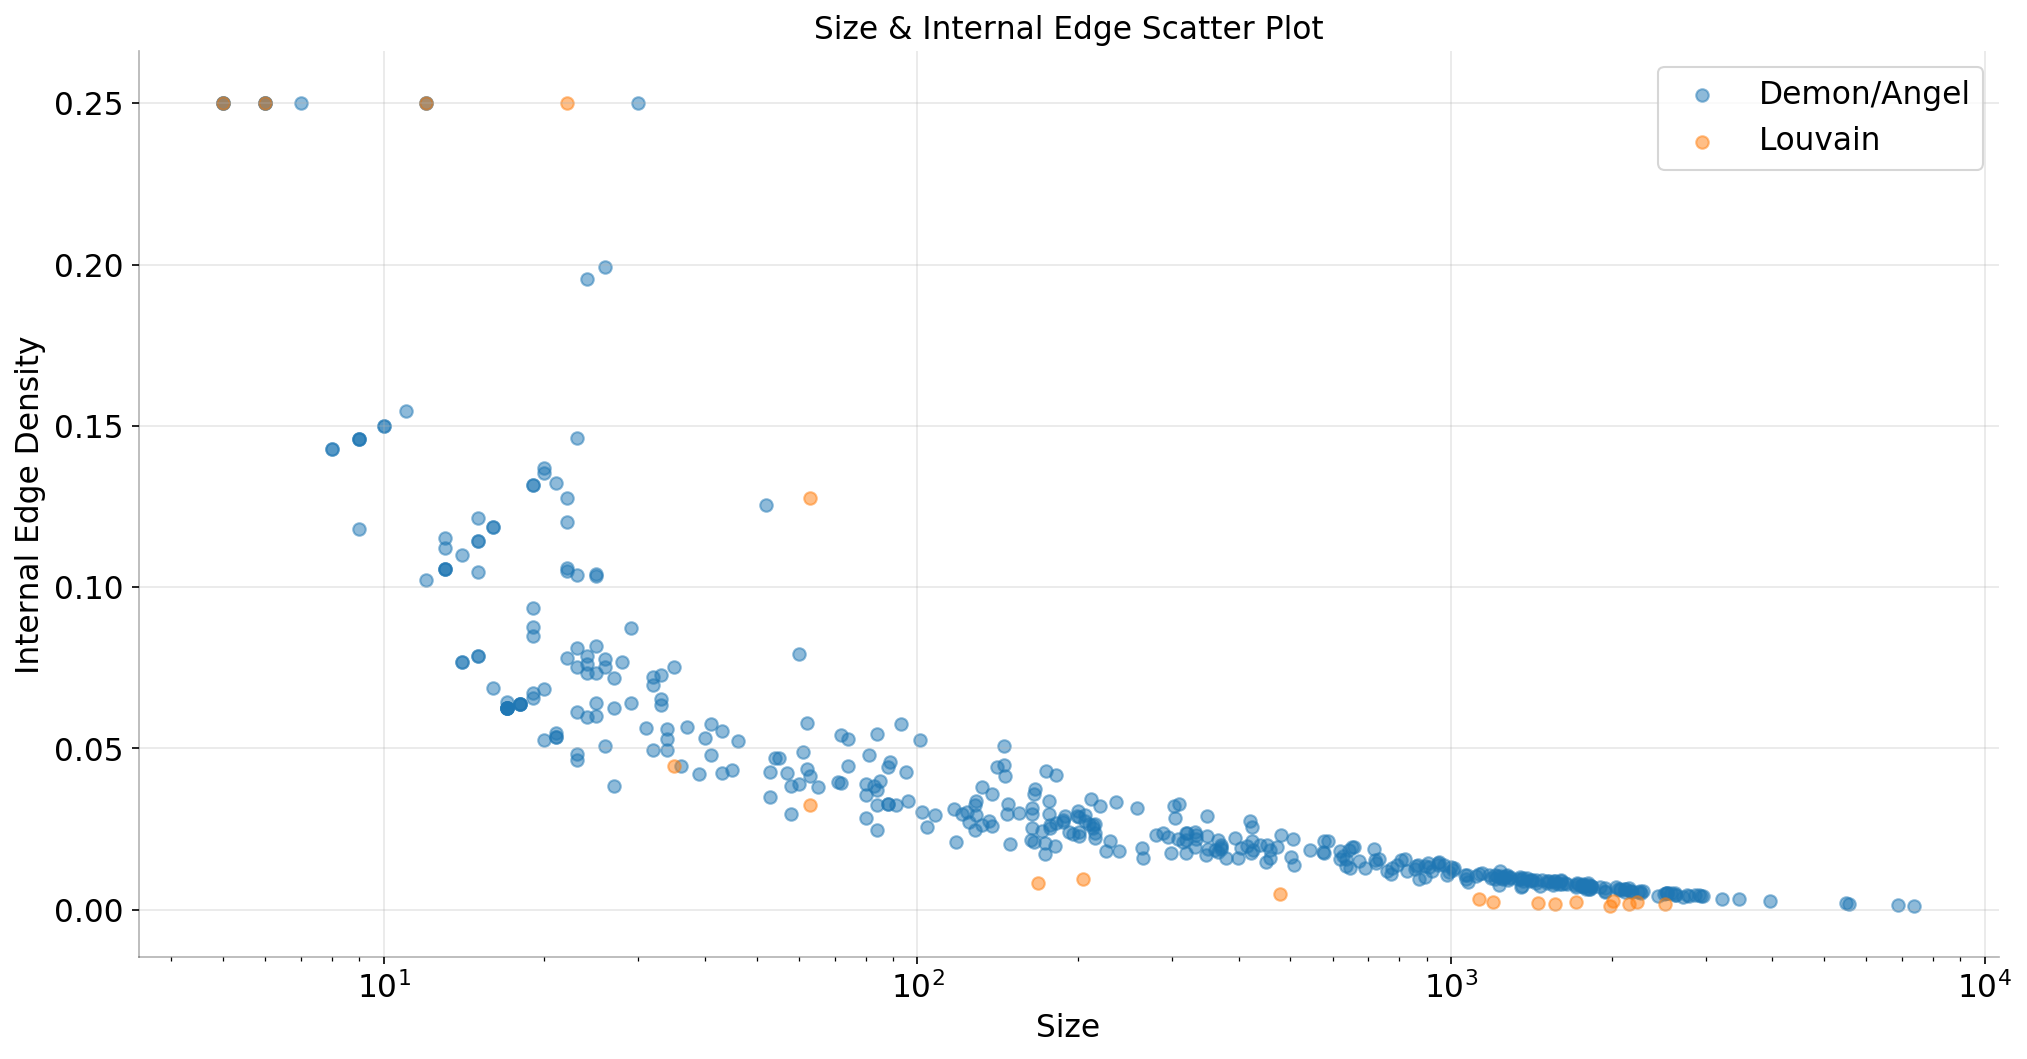

In [55]:
scatter_plot(edge_density_louvain_demon, "Size & Internal Edge")

In [56]:
edge_density_all= [(label_size, label_internal_edge_density, "Label Propagation"),
                       (GM_size, GM_internal_edge_density, "GM"),
                       (demon_size, demon_internal_edge_density, "Demon"),
                       (louvain_size, louvain_internal_edge_density, "Louvain")]

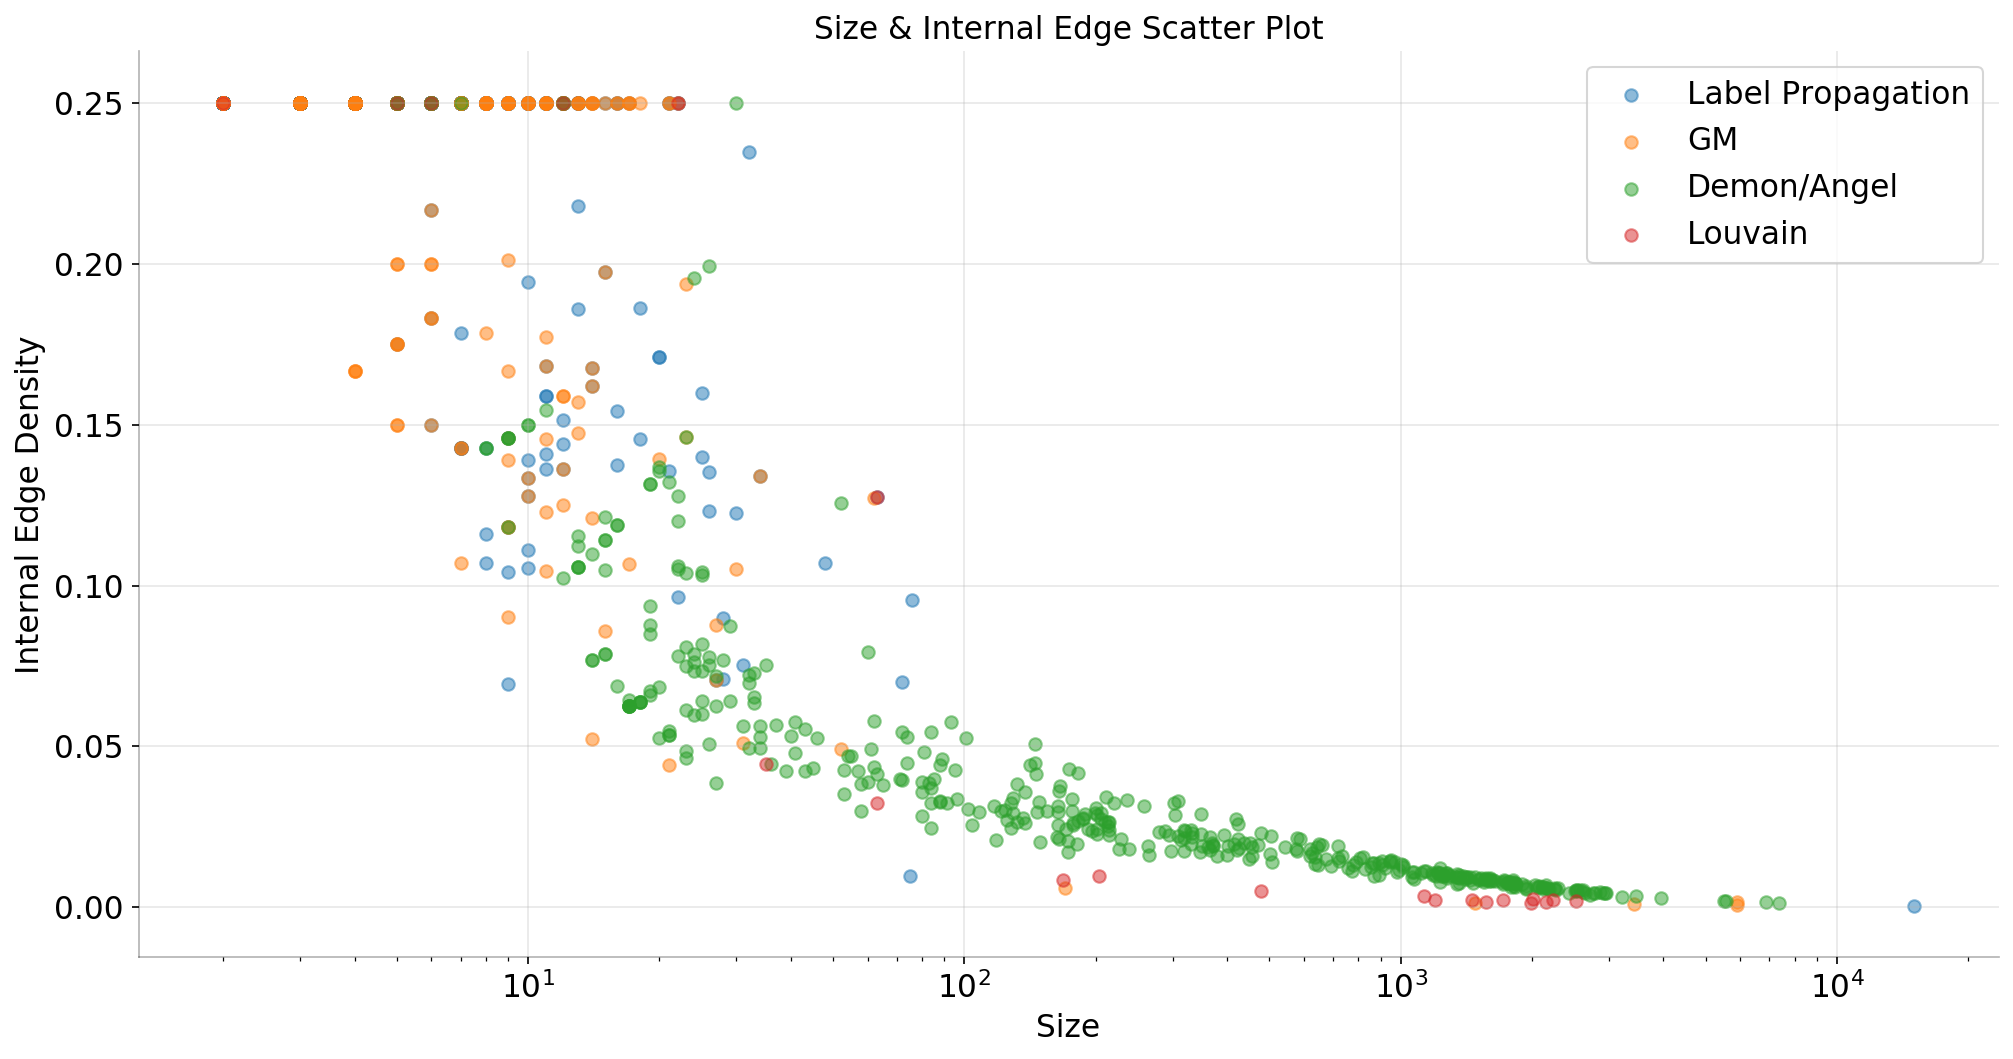

In [57]:
scatter_plot(edge_density_all, "Size & Internal Edge")

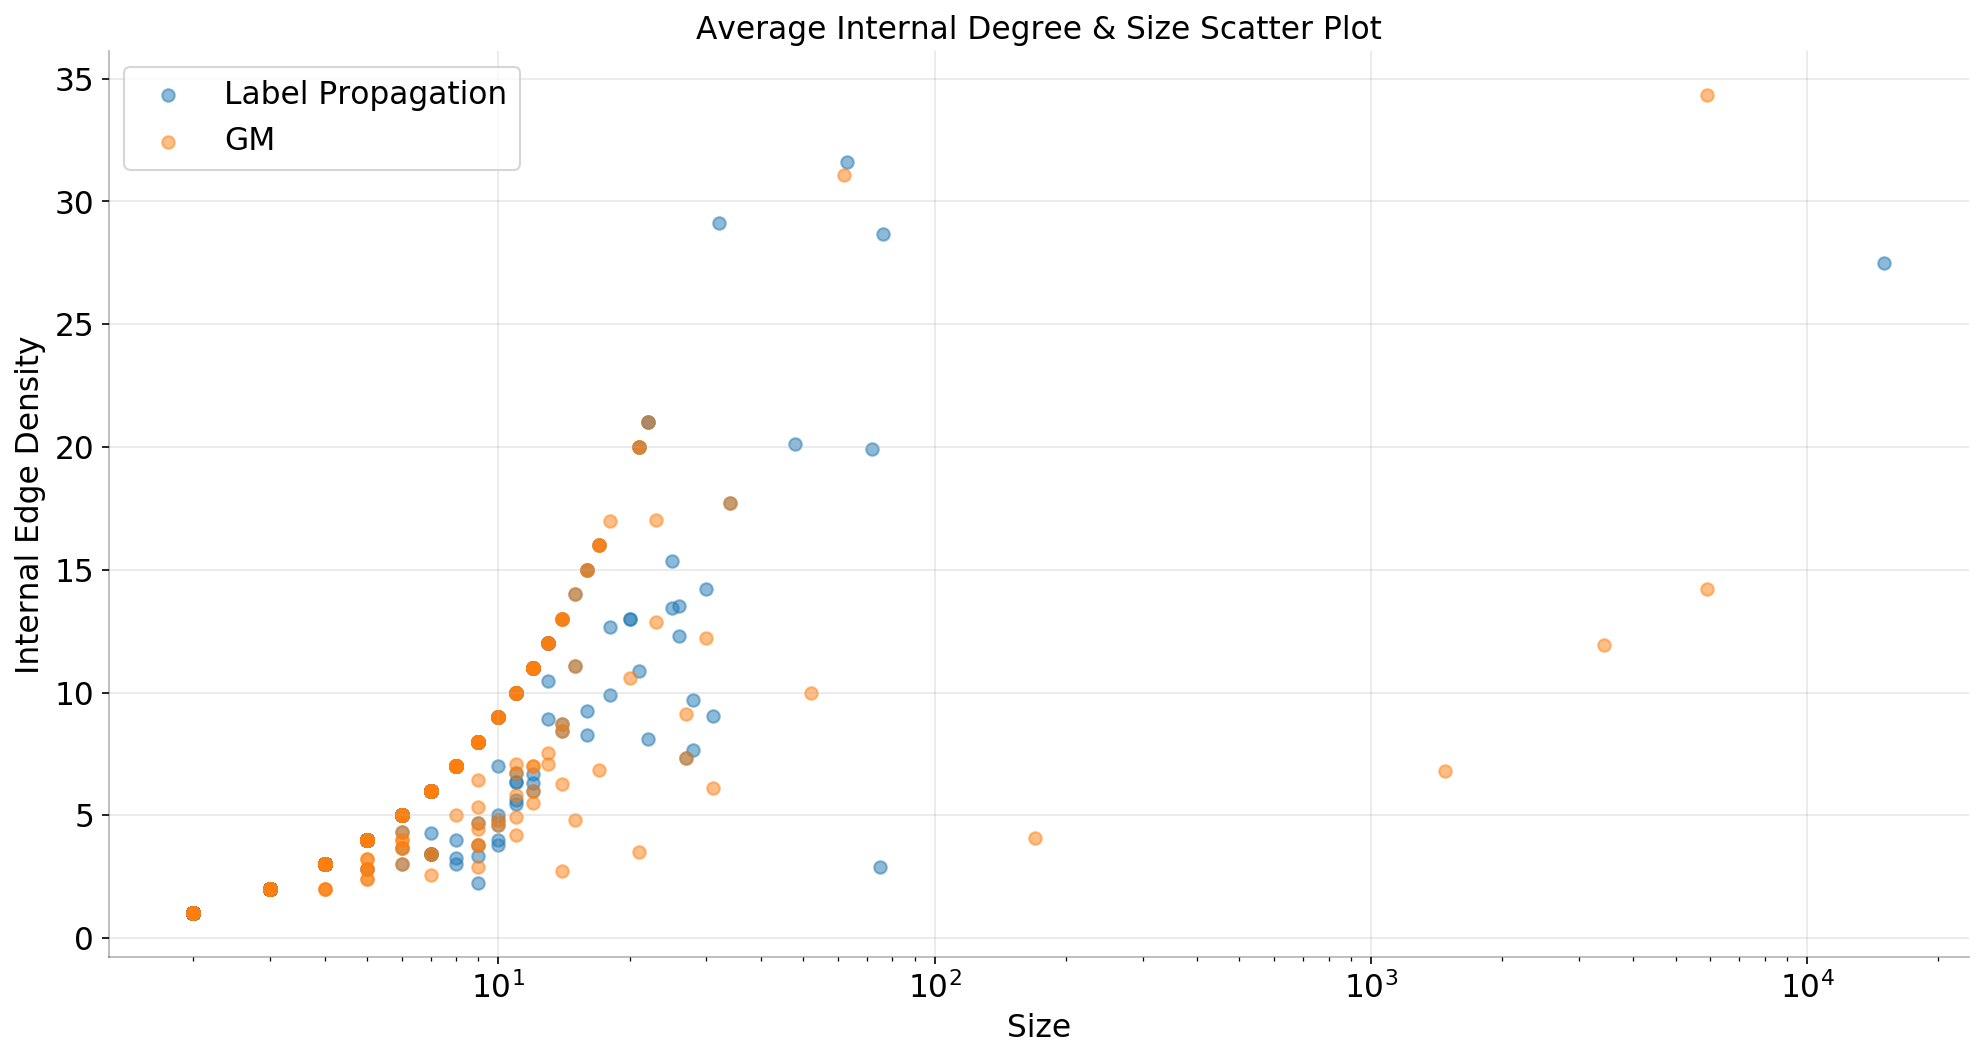

In [58]:
avg_internal_deg_GM_label = [(label_size, label_avg_internal_deg, "Label Propagation"),
                       (GM_size, GM_avg_internal_deg, "GM")]
scatter_plot(avg_internal_deg_GM_label, "Average Internal Degree & Size")

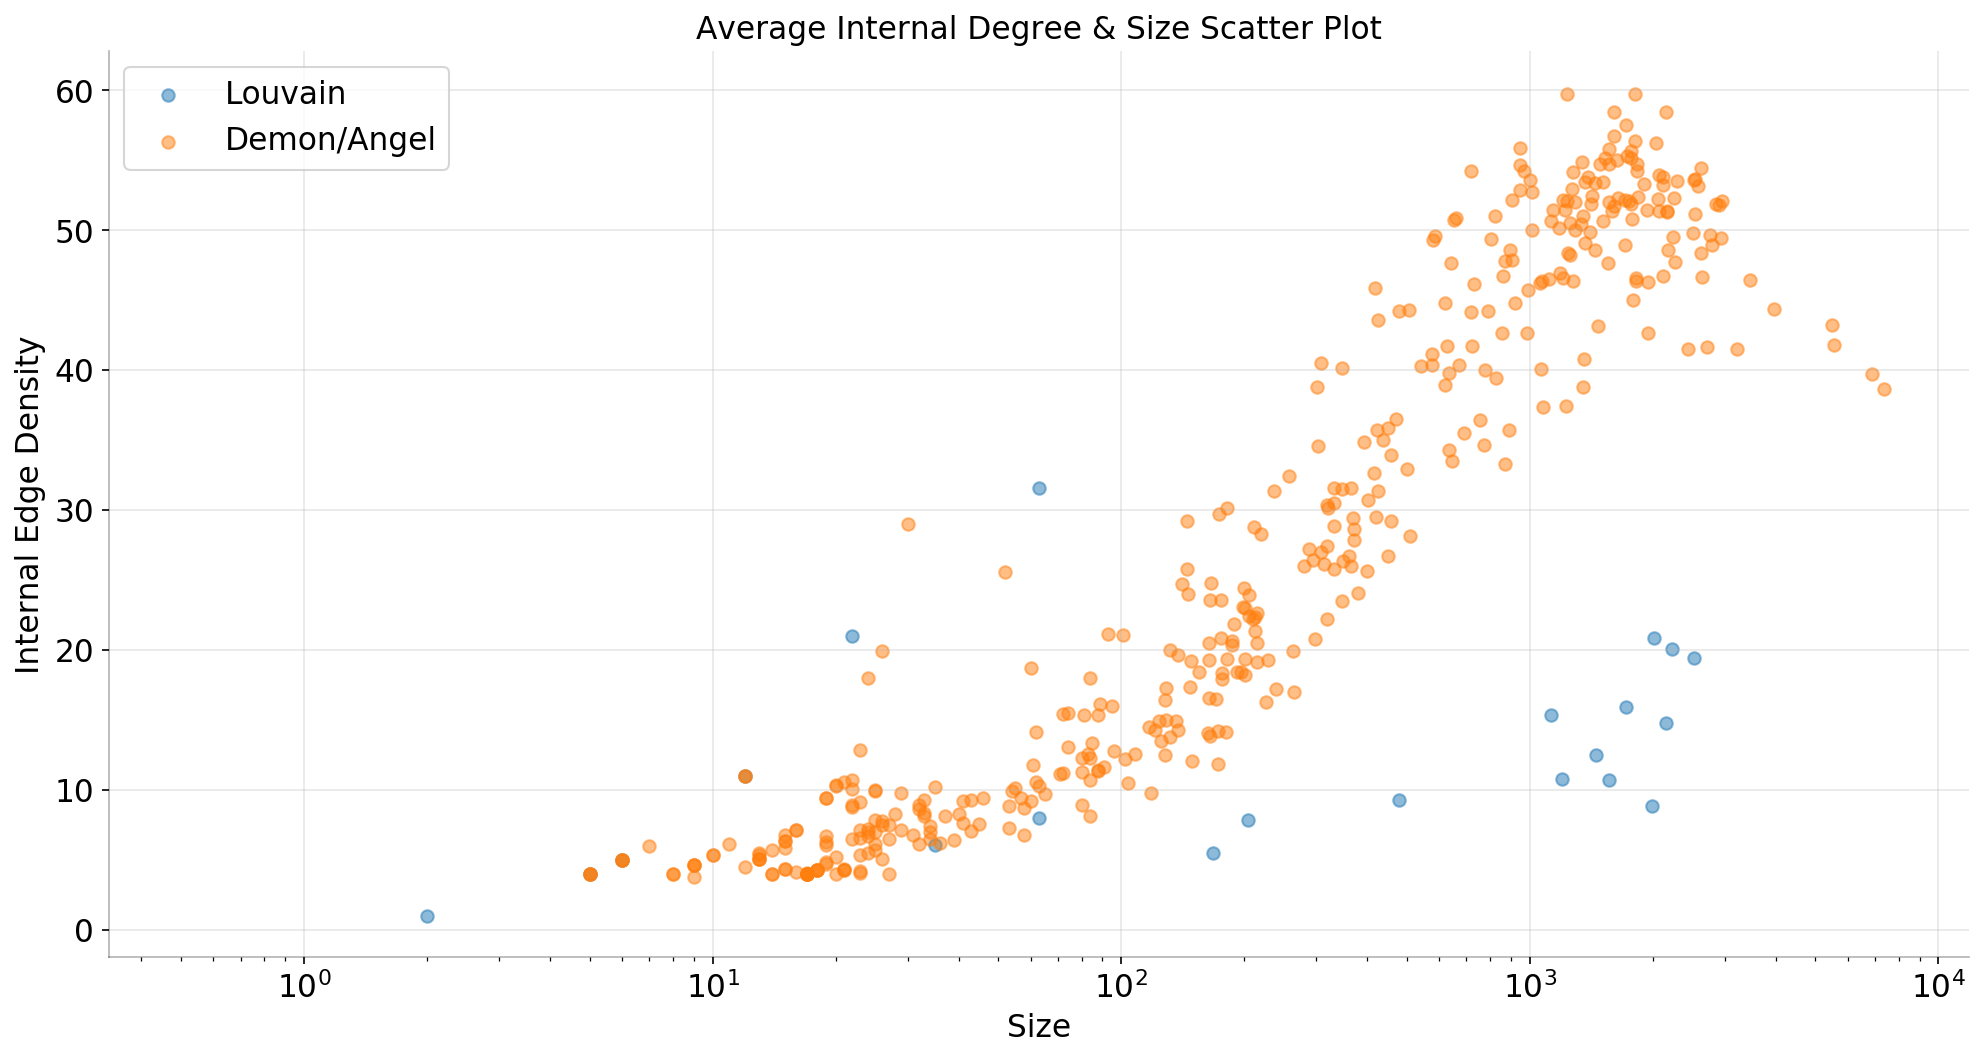

In [59]:
avg_internal_deg_louvain_demon = [(louvain_size, louvain_avg_internal_deg, "Louvain"),
                       (demon_size, demon_avg_internal_deg, "Demon")]
scatter_plot(avg_internal_deg_louvain_demon, "Average Internal Degree & Size")

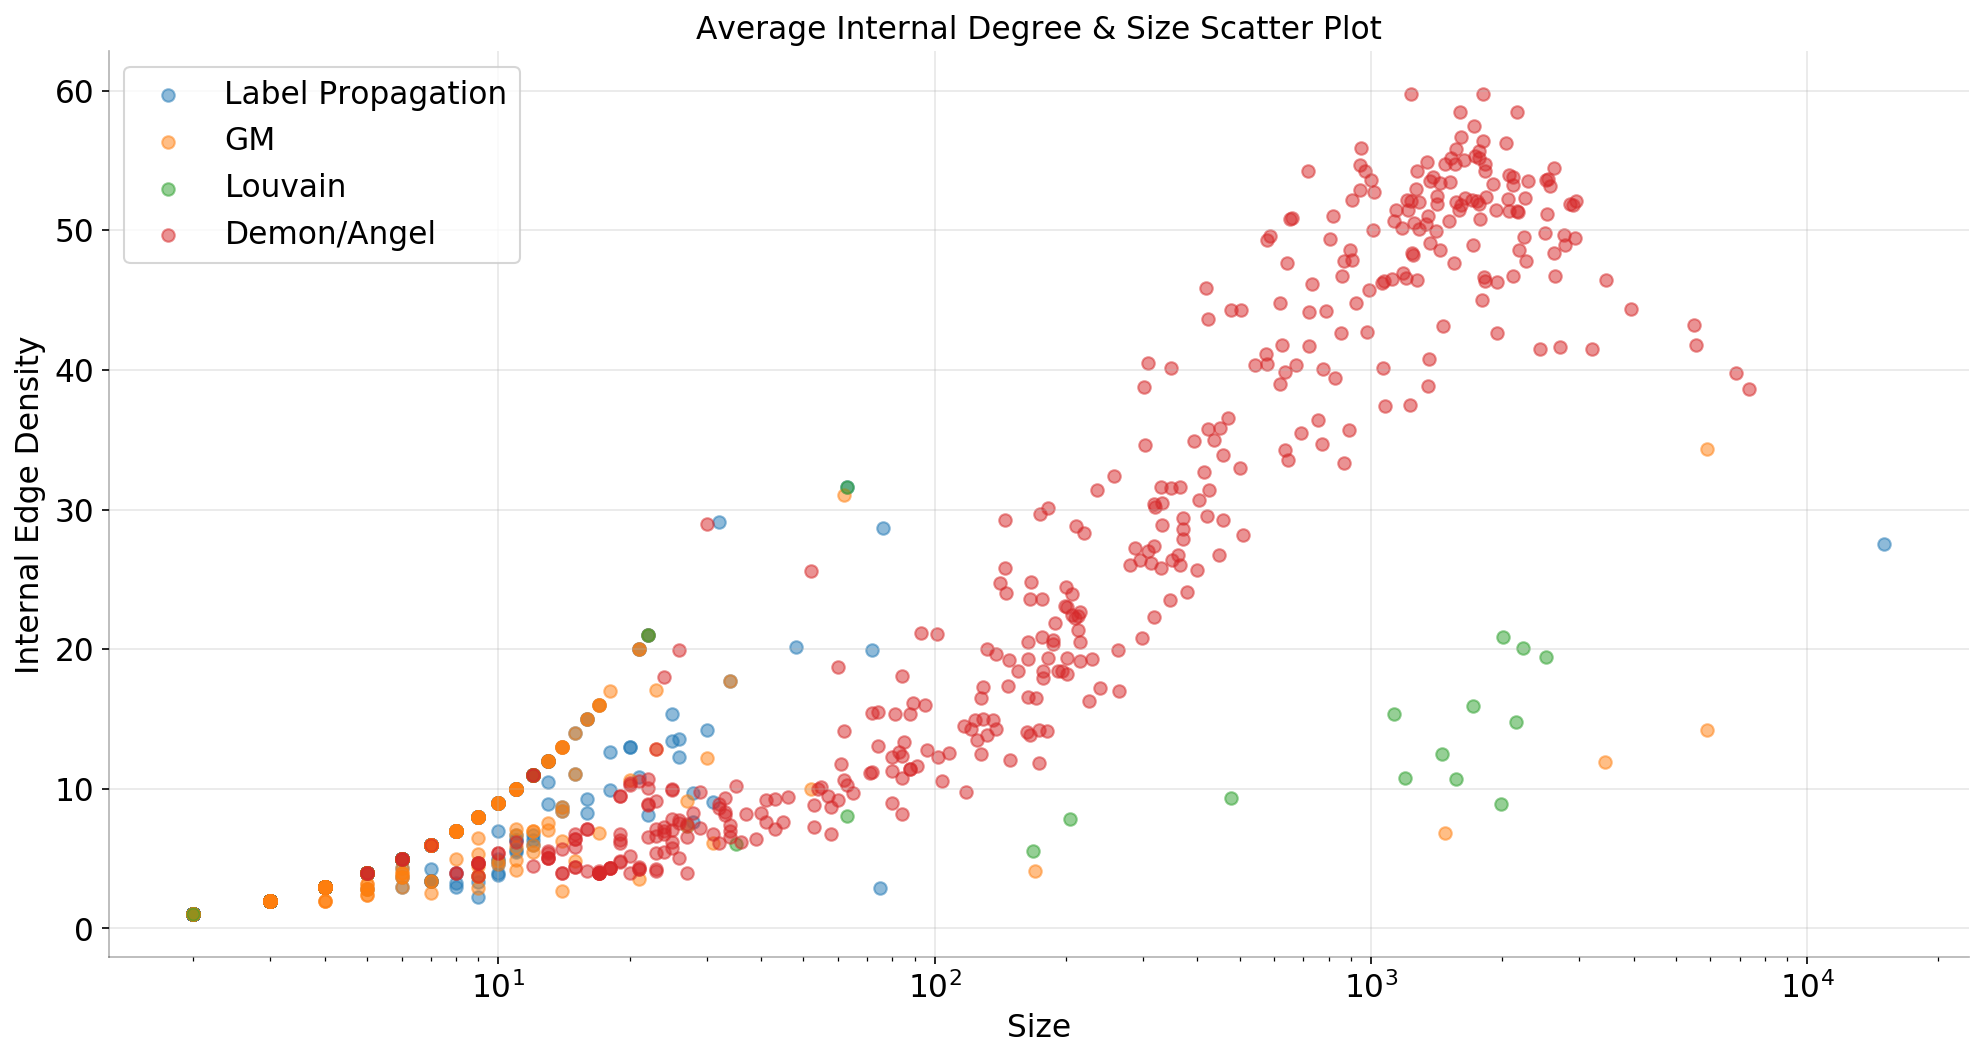

In [60]:
avg_internal_deg_all = [(label_size, label_avg_internal_deg, "Label Propagation"),
                       (GM_size, GM_avg_internal_deg, "GM"),
                       (louvain_size, louvain_avg_internal_deg, "Louvain"),
                       (demon_size, demon_avg_internal_deg, "Demon")]
scatter_plot(avg_internal_deg_all, "Average Internal Degree & Size")